In [113]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
import missingno as mno
# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.impute import KNNImputer


## Reading Dataset


In [114]:
#importing data
data = pd.read_csv("data.csv")
data.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
#size of dataset
data.shape

(22792, 15)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      22792 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   position        22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22792 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [117]:
#summarizing data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22792.0,38.593542,13.657228,17.0,28.0,37.0,48.0,90.0
work-fnl,22792.0,189633.717138,104966.047094,12285.0,118376.0,178384.0,236789.0,1484705.0
education-num,22792.0,10.084065,2.556860,1.0,9.0,10.0,12.0,16.0
capital-gain,22792.0,1061.232757,7342.691929,0.0,0.0,0.0,0.0,99999.0
capital-loss,22792.0,86.730037,400.970842,0.0,0.0,0.0,0.0,4356.0
hours-per-week,22792.0,40.409705,12.283072,1.0,40.0,40.0,45.0,99.0


## Data cleaning and Preprocessing


#### Droping the unnecessary columns

The column 'education-num' is a label-encoded version of the column 'education' with ordinality taken into account, which means that the column 'education' is not needed.

Text(0.5, 1.0, 'Education VS Salary')

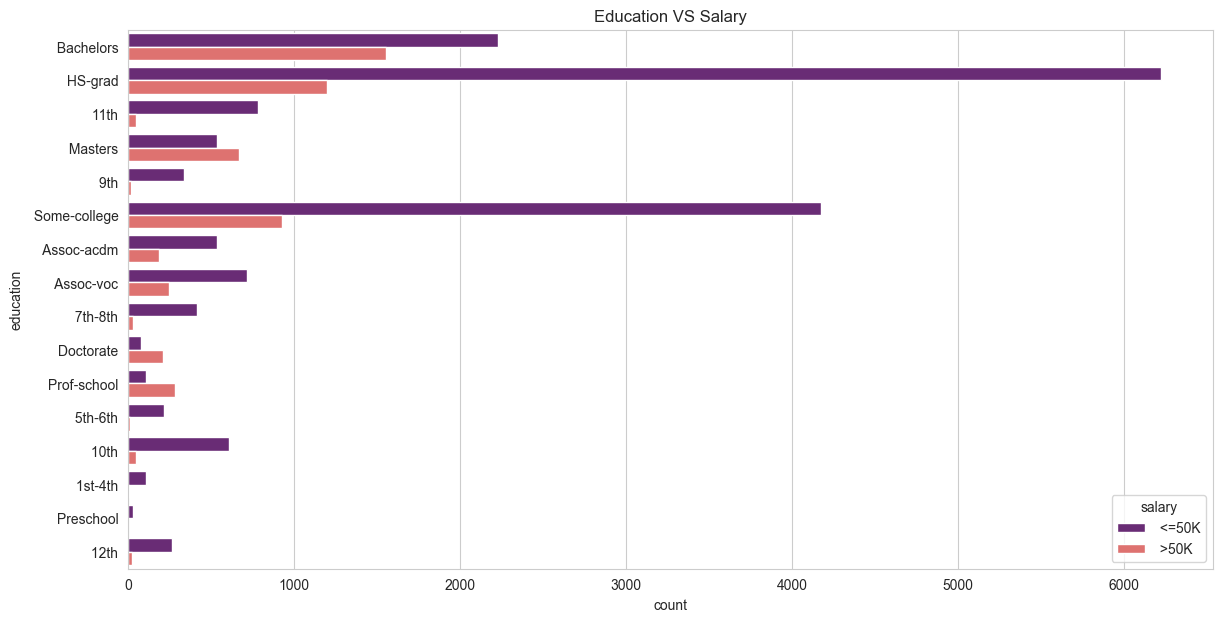

In [118]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data,y='education', hue='salary', palette="magma")
sns.set_palette('Accent_r')
ax.set_title('Education VS Salary')

In [119]:
data = data.drop('education', axis=1)

data.head()

,age,work-class,work-fnl,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Handling Null Values

There's no null values in the dataset, however there are "?" values which needs to be handled.

In [120]:
data.isna().sum().max()

0

In [121]:
 # trim column values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [122]:
#remove null values
data = data.replace({'?': np.nan})
for col in data.columns:
    data[col] = data[col].fillna(data[col].mode()[0])
data.shape

(22792, 14)

## Exploratory Data Analysis

In [123]:
bin_cnt = 1 + (4/3) * math.log10(data.salary.count())
math.ceil(bin_cnt)
bin_cnt = int(bin_cnt)
bin_cnt

6

Text(0.5, 1.0, 'Salary Distribution')

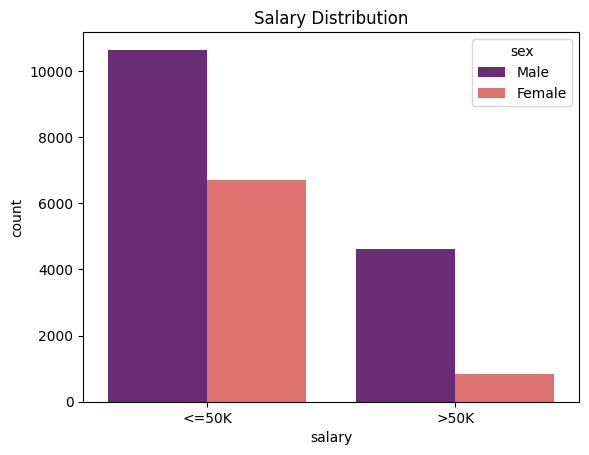

In [104]:
# How the target variable is distributed
ax = sns.countplot(data,x="salary", hue=data['sex'], palette="magma")
ax.set_title('Salary Distribution')

In [105]:


def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    sns.boxenplot(data=data, x='salary', y=feature, ax=ax, hue=hue, palette="magma")
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())

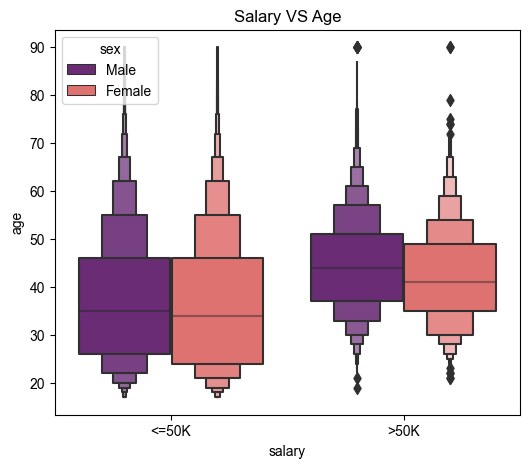

In [106]:
# Salary VS Age
draw_boxen_plot('age', 'sex')

C:\Users\Mariam\AppData\Local\Temp\ipykernel_26484\2940344580.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x="age", bins=bin_cnt, palette="magma", color="purple", kde=True)


<AxesSubplot: xlabel='age', ylabel='Count'>

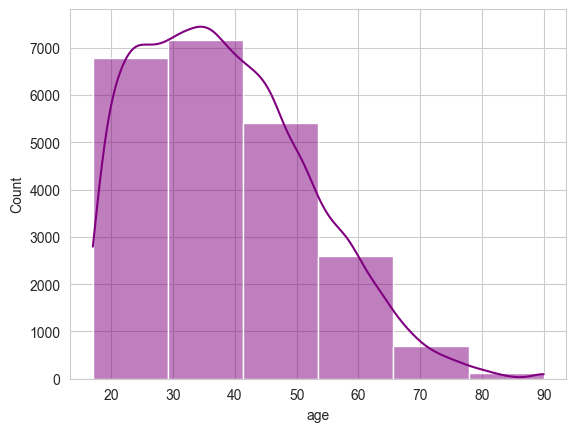

In [110]:
sns.histplot(data=data, x="age", bins=bin_cnt, palette="magma", color="purple", kde=True)

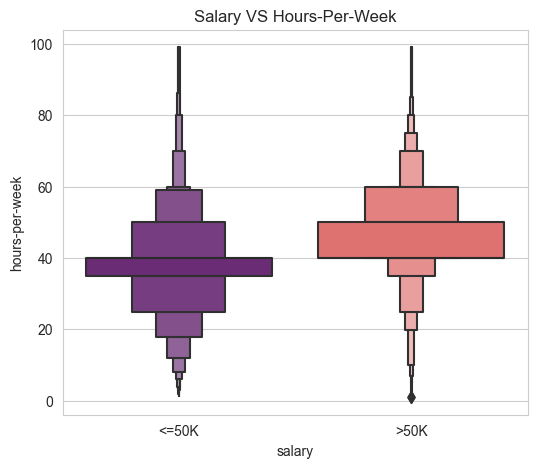

In [124]:
# hours-per-week VS Salary
draw_boxen_plot('hours-per-week')

Text(0.5, 1.0, 'Workclass VS Salary')

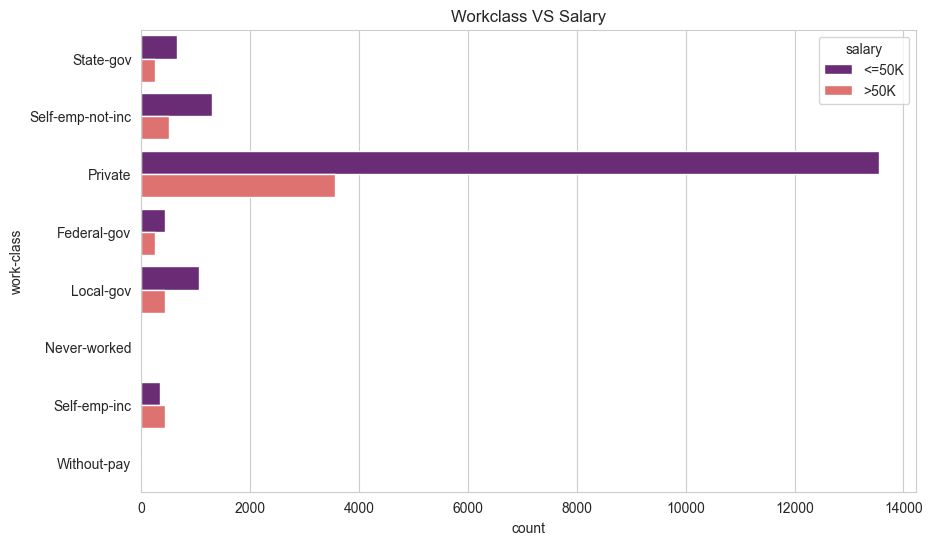

In [107]:


fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data,y='work-class', hue='salary', palette="magma")
ax.set_title('Workclass VS Salary')



Text(0.5, 1.0, 'Race VS Salary')

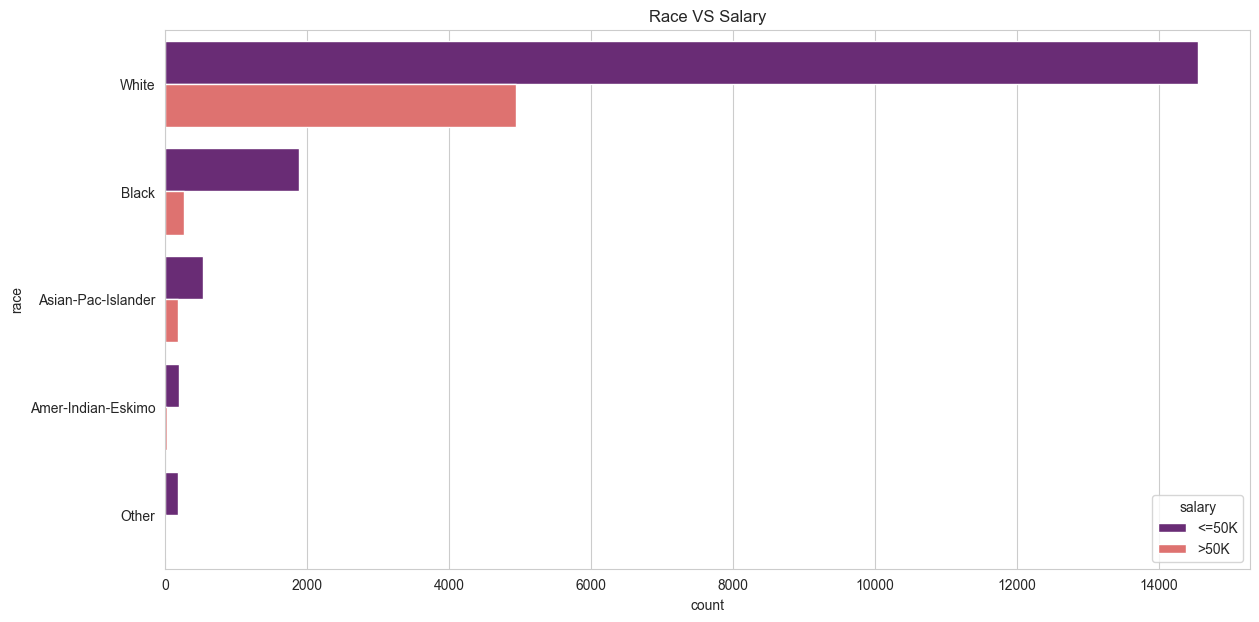

In [109]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data,y='race', hue='salary', palette="magma")
sns.set_palette('Accent_r')
ax.set_title('Race VS Salary')

C:\Users\Mariam\AppData\Local\Temp\ipykernel_26484\3115591285.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['work-fnl'], color="purple")


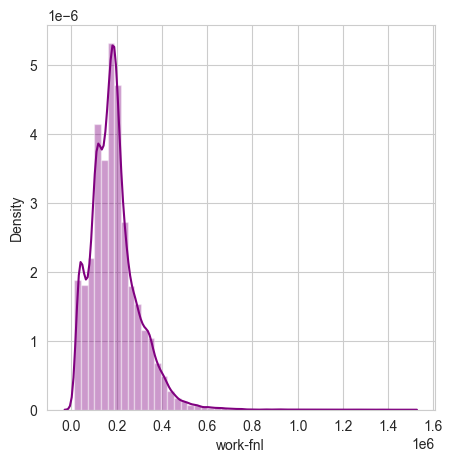

In [126]:
plt.figure(figsize=(5,5))
sns.distplot(data['work-fnl'], color="purple")
plt.show()

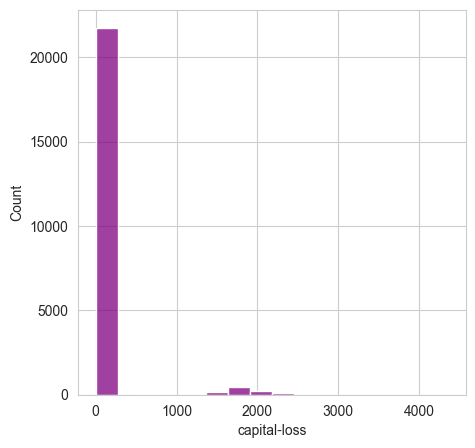

In [128]:
plt.figure(figsize=(5,5))
sns.histplot(data['capital-loss'], color="purple")
plt.show()

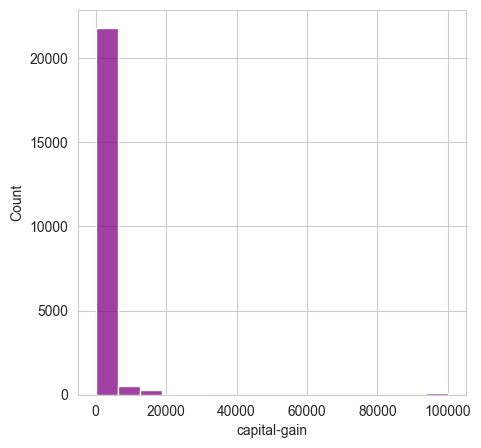

In [129]:
plt.figure(figsize=(5,5))
sns.histplot(data['capital-gain'], color="purple")
plt.show()

<AxesSubplot: ylabel='Marital Status'>

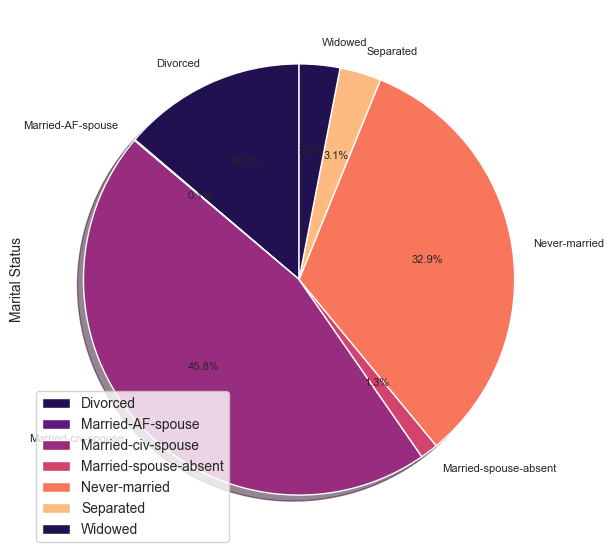

In [136]:
plt.figure(figsize=(10, 7))
colors = sns.color_palette('magma')
data.groupby('marital-status').size().plot(kind='pie',label='Marital Status',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=8, 
                               shadow=True, startangle=90)

Text(0.5, 1.0, 'Marital Status VS Salary')

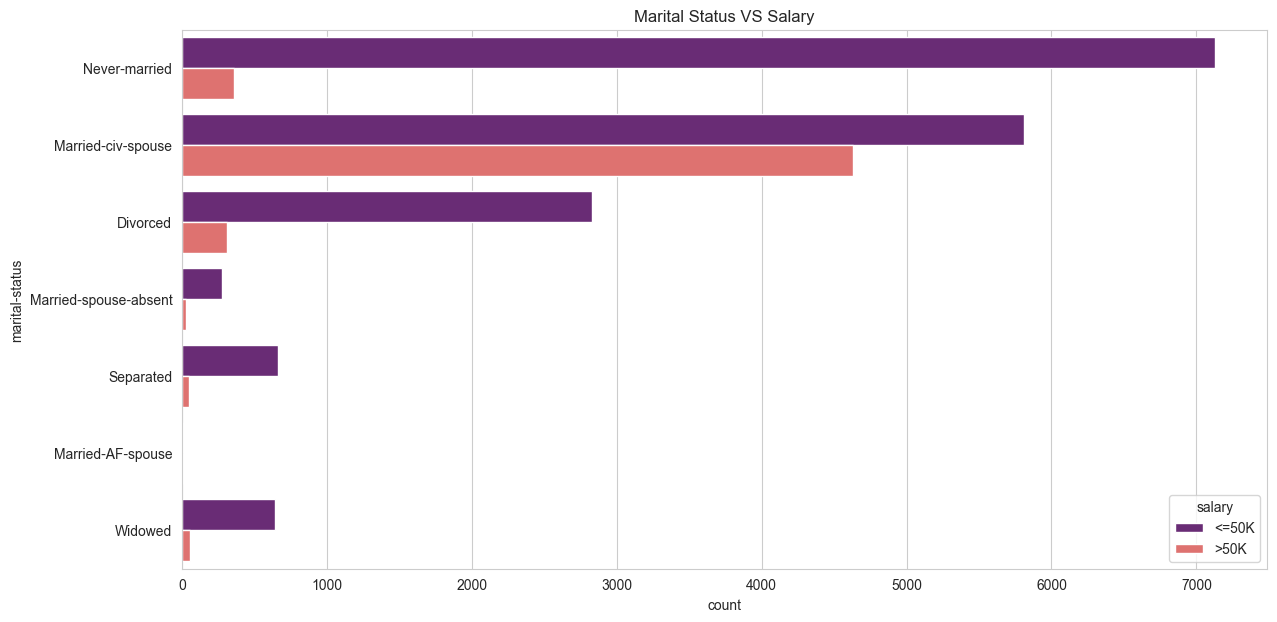

In [134]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data,y='marital-status', hue='salary', palette="magma")
sns.set_palette('Accent_r')
ax.set_title('Marital Status VS Salary')

<AxesSubplot: ylabel='Position'>

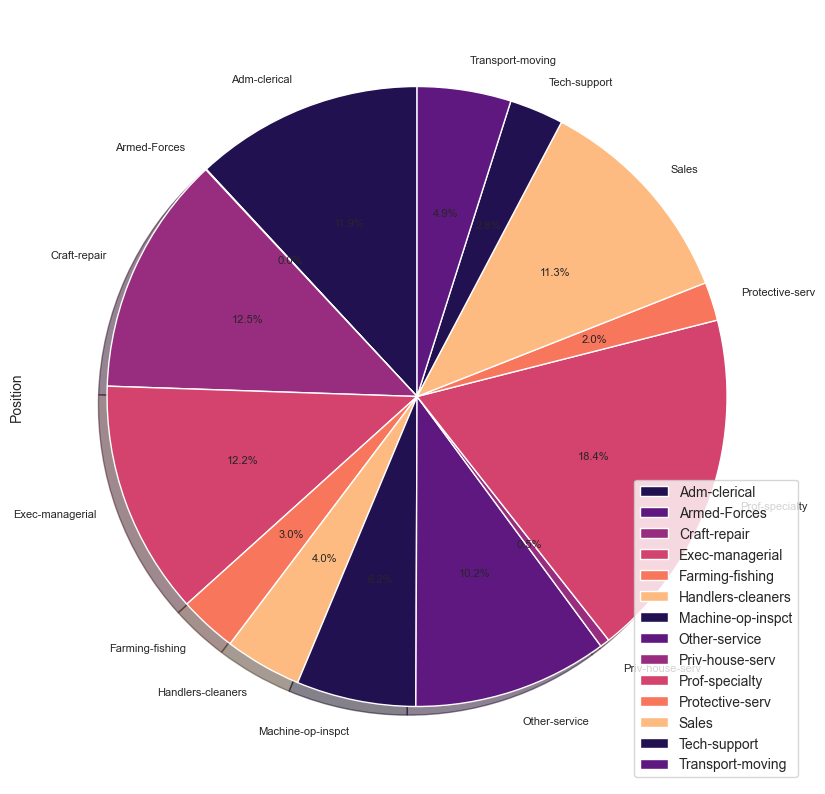

In [141]:
plt.figure(figsize=(10, 14))
colors = sns.color_palette('magma')
data.groupby('position').size().plot(kind='pie',label='Position',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=8, 
                               shadow=True, startangle=90)

Text(0.5, 1.0, 'Position VS Salary')

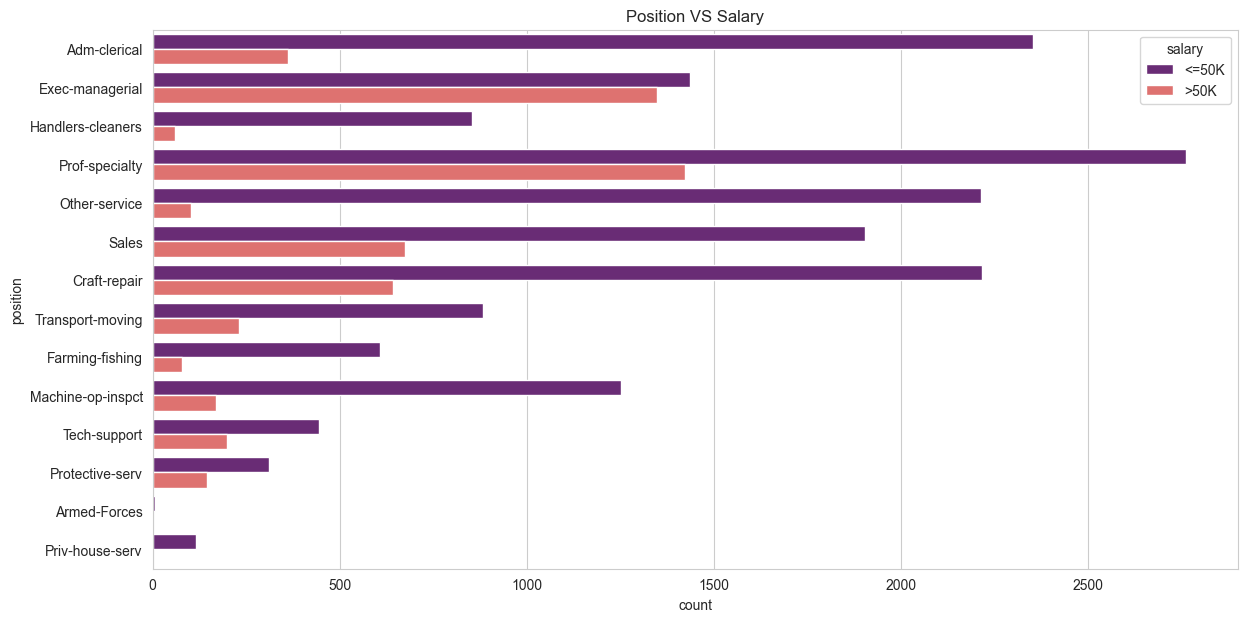

In [142]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data,y='position', hue='salary', palette="magma")
sns.set_palette('Accent_r')
ax.set_title('Position VS Salary')

Text(0.5, 1.0, 'Native Country VS Salary')

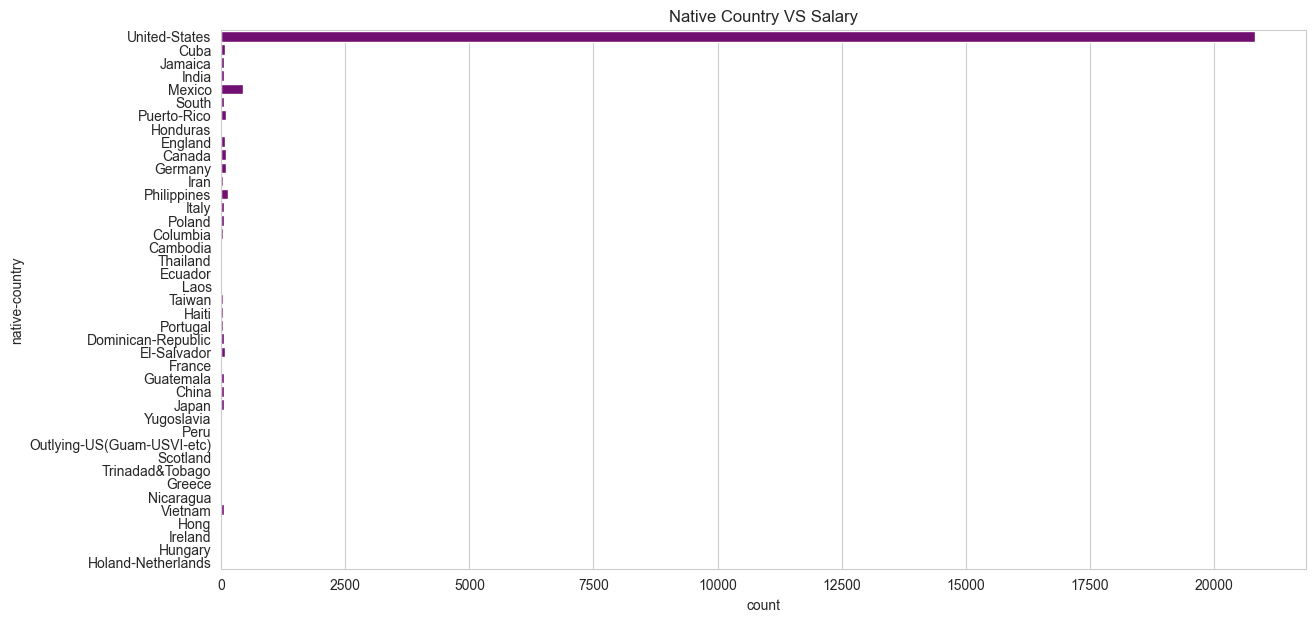

In [149]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data,y='native-country',color="purple")
sns.set_palette('Accent_r')
ax.set_title('Native Country VS Salary')

<AxesSubplot: ylabel='Relationship'>

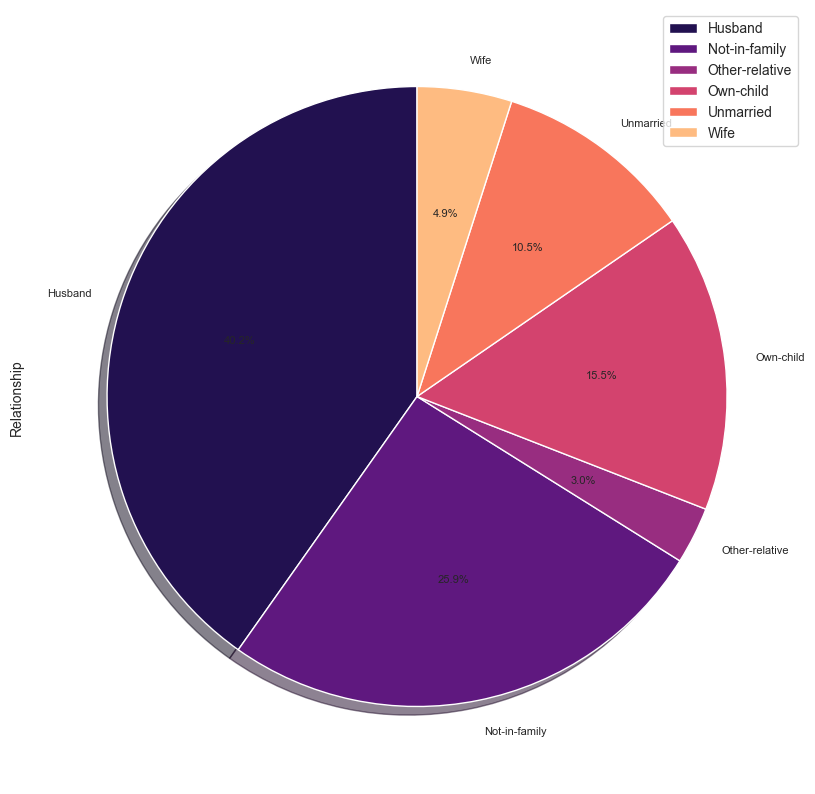

In [150]:
plt.figure(figsize=(10, 14))
colors = sns.color_palette('magma')
data.groupby('relationship').size().plot(kind='pie',label='Relationship',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=8, 
                               shadow=True, startangle=90)

<AxesSubplot: ylabel='Salary'>

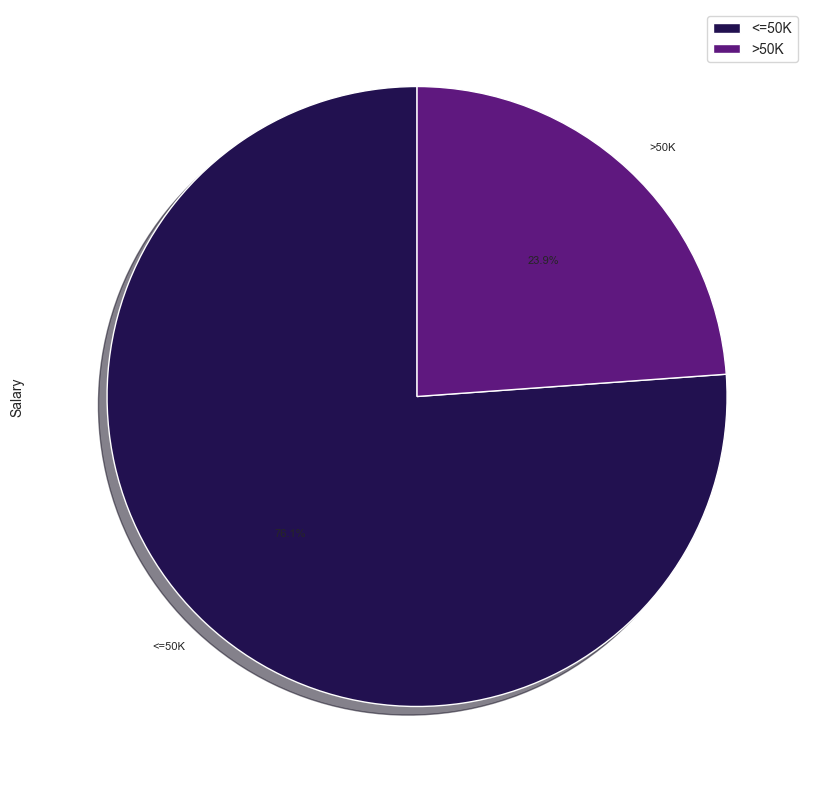

In [151]:
plt.figure(figsize=(10, 14))
colors = sns.color_palette('magma')
data.groupby('salary').size().plot(kind='pie',label='Salary',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=8, 
                               shadow=True, startangle=90)

## Data Cleansing


### Removing Duplicates

In [10]:
#remove duplicate rows
data = data.drop_duplicates()
data.shape

(22777, 14)

In [11]:
22792 - 22777


15

As we can see there are 14 duplicate rows.

In [12]:
data.shape

(22777, 14)

### Removing Outliers

In [13]:

outAge = data[data['age'] > 61]
outAge.shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(1436, 14)

In [14]:
data.drop(outAge.index, inplace = True)

In [15]:
df_old = data[(data.age >= 80)&(data['hours-per-week'] >=50)]

In [16]:
data.drop(data.loc[df_old.index].index,axis=0,inplace=True)

In [17]:
df_young = data[(data.age <=20)&(data['salary'] ==' >50K')]

In [18]:
data.drop(data.loc[df_young.index].index,axis=0,inplace=True)

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
def remove_outlier_IQR(df):
    num_columns = [x for x in df.columns if df[x].dtype !=object]
    reduced_df=df[num_columns]
    Q1=reduced_df.quantile(0.25)
    Q3=reduced_df.quantile(0.75)
    IQR=Q3-Q1
    df_final_index=reduced_df[~((reduced_df<(Q1-1.5*IQR)) | (reduced_df>(Q3+1.5*IQR)))].index
    return df.loc[df_final_index.values]

In [22]:

data= remove_outlier_IQR(data)


In [23]:
data.shape

(21341, 14)

In [24]:
22777-21341

1436

### Mapping Salary Column

In [20]:
data['salary'] = data['salary'].map({'>50K': 1, '<=50K': 0})

## Feature Selection

In [25]:
X = data.drop('salary', axis = 1)
y = data['salary']
# split into train and test sets
#splitting by stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 stratify=y,
                                                    test_size = 0.2,
                                                   random_state = 4)# prepare input data

In [26]:
le = preprocessing.LabelEncoder()

X_train['position'] = le.fit_transform(X_train.position.values)
X_train['native-country'] = le.fit_transform(X_train['native-country'].values)
X_train['work-class'] = le.fit_transform(X_train['work-class'].values)
X_train['marital-status'] = le.fit_transform(X_train['marital-status'].values)
X_train['relationship'] = le.fit_transform(X_train['relationship'].values)
X_train['race'] = le.fit_transform(X_train['race'].values)
X_train['sex'] = le.fit_transform(X_train['sex'].values)

X_test['position'] = le.fit_transform(X_test.position.values)
X_test['native-country'] = le.fit_transform(X_test['native-country'].values)
X_test['work-class'] = le.fit_transform(X_test['work-class'].values)
X_test['marital-status'] = le.fit_transform(X_test['marital-status'].values)
X_test['relationship'] = le.fit_transform(X_test['relationship'].values)
X_test['race'] = le.fit_transform(X_test['race'].values)
X_test['sex'] = le.fit_transform(X_test['sex'].values)

In [27]:
X_train.head()

,age,work-class,work-fnl,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7096,46,3,170850,13,0,6,1,4,1,0,1590,40,38
13256,55,3,160303,9,6,0,2,4,0,0,0,40,38
15835,29,3,150861,9,4,0,1,4,0,0,0,40,38
2047,53,3,166368,10,4,2,1,4,1,0,0,40,38
16313,28,3,124680,13,4,3,1,4,0,6849,0,60,38


[0.15593526 0.0416333  0.15701645 0.126943   0.07117689 0.07834589
 0.09993372 0.01629658 0.02548381 0.0891883  0.02885926 0.0927653
 0.01642225]


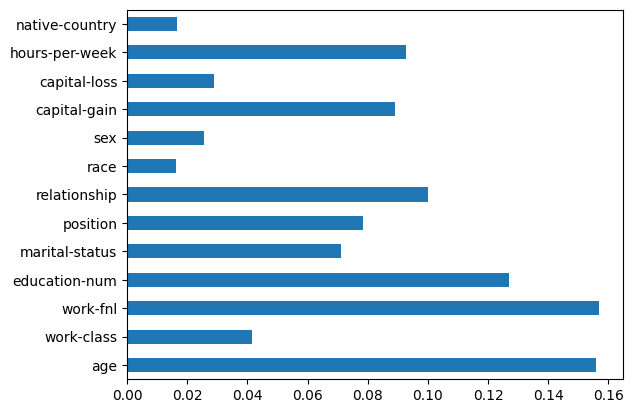

In [28]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh', )
plt.show()

In [29]:
#data = data.drop("capital-loss", axis=1)
data = data.drop("native-country", axis=1)


## Handling Categorical Data
We use one hot encoding

In [30]:
data = pd.get_dummies(data, columns=['position'], prefix='position')
data = pd.get_dummies(data, columns=['work-class'], prefix='work')
data = pd.get_dummies(data, columns=['marital-status'], prefix='marital')
data = pd.get_dummies(data, columns=['relationship'], prefix='relationship')
data = pd.get_dummies(data, columns=['race'], prefix='race')
data = pd.get_dummies(data, columns=['sex'], prefix='sex')



## Splitting DataFrame

In [31]:
X = data.drop('salary', axis = 1)
y = data['salary']


In [32]:
#splitting by stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify=y,
                                                   test_size = 0.2,
                                                   random_state = 4)

### Scaling and Balancing The Data

In [33]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## KNN Classification 


In [34]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_selection import chi2, SelectKBest, f_classif


In [35]:
# calculating the accuracy of models with different values of k
for i in range(20,40):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=i, weights="distance", metric="manhattan")
    neigh.fit(X_train, y_train)
    knnres =neigh.predict(X_test)
    print(i," " ,accuracy_score(y_test, knnres))


20   0.8404778636683063
21   0.8379011478097915
22   0.8400093698758492
23   0.8376669009135629
24   0.8404778636683063
25   0.8390723822909346
26   0.8409463574607636
27   0.8411806043569923
28   0.8409463574607636
29   0.8423518388381354
30   0.8418833450456782
31   0.8404778636683063
32   0.8400093698758492
33   0.8402436167720778
34   0.8418833450456782
35   0.8414148512532209
36   0.8423518388381354
37   0.8416490981494495
38   0.8430545795268213
39   0.8418833450456782


In [36]:
#Apply KNN
neigh = KNeighborsClassifier(n_neighbors=38, weights="distance", metric="manhattan")
neigh.fit(X_train, y_train)
knnres =neigh.predict(X_test)


In [37]:
#Calculate accuracy 
knnaccuracy = accuracy_score(y_test, knnres)
print (knnaccuracy*100,"%")

84.30545795268213 %


In [38]:
neigh.score(X_train, y_train)

0.9999414245548266

In [39]:
print(classification_report(y_test, knnres))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3242
           1       0.71      0.58      0.64      1027

    accuracy                           0.84      4269
   macro avg       0.79      0.75      0.77      4269
weighted avg       0.84      0.84      0.84      4269



<AxesSubplot: >

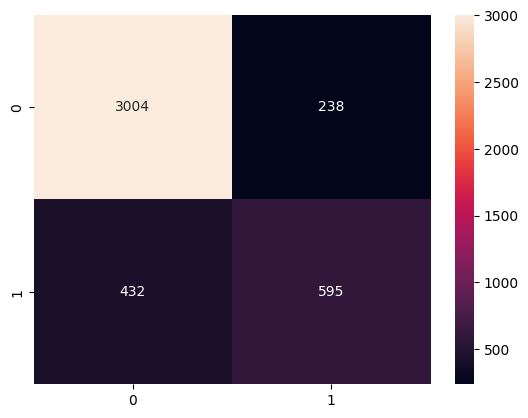

In [40]:
cm = confusion_matrix(y_test,neigh.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

## Decision Tree 

In [45]:
# calculating the accuracy of models with different values of max_depth
for i in range(2,20):
    #Train Model and Predict  
    clf = DecisionTreeClassifier(random_state=42, max_depth =i, max_leaf_nodes=62)
    clf.fit(X_train, y_train)
    clfres =clf.predict(X_test)
    print(i," " ,accuracy_score(y_test, clfres))


2   0.825720309205903
3   0.8390723822909346
4   0.8400093698758492
5   0.8418833450456782
6   0.8491449988287655
7   0.8489107519325368
8   0.8496134926212228
9   0.8559381588193956
10   0.8524244553759662
11   0.8521902084797377
12   0.8503162333099087
13   0.8496134926212228
14   0.8496134926212228
15   0.8496134926212228
16   0.8496134926212228
17   0.8496134926212228
18   0.8496134926212228
19   0.8496134926212228


In [46]:
#applying descision tree
clf = DecisionTreeClassifier(random_state=42, max_depth =9, max_leaf_nodes=62)
clf = clf.fit(X_train, y_train)


In [47]:
#Predicting test
clfres =clf.predict(X_test)
print (clfres)


[0 1 0 ... 0 0 0]


In [48]:
#calculating accuracy
clfaccuracy = accuracy_score(y_test, clfres)
print (clfaccuracy*100,"%")

85.59381588193956 %


In [49]:
clf.score(X_train, y_train)

0.8650421743205249

In [50]:
print(classification_report(y_test, clfres))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3242
           1       0.76      0.59      0.66      1027

    accuracy                           0.86      4269
   macro avg       0.82      0.77      0.79      4269
weighted avg       0.85      0.86      0.85      4269



<AxesSubplot: >

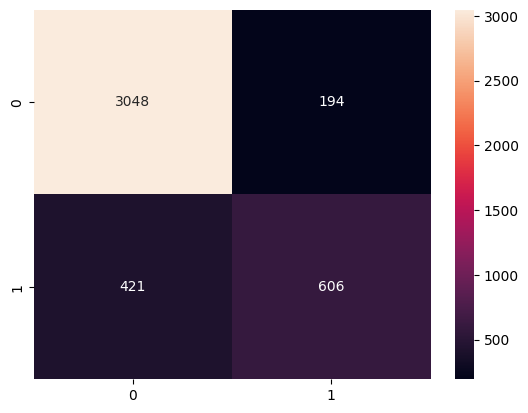

In [51]:
#Plotting Confusion Matrix

cm = confusion_matrix(y_test,clf.predict(X_test))

sns.heatmap(cm,annot=True,fmt="d")

## Support Vector Machines

In [52]:
#importig libraries
from sklearn.svm import SVC

In [53]:
#applying SVM
supp =SVC(kernel="linear", gamma=1)
supp.fit(X_train, y_train)
#prediciting
supres = supp.predict(X_test)
#calculating accuracy
supaccuracy = accuracy_score(y_test, supres)
print (supaccuracy*100,"%")

85.40641836495666 %


In [54]:
#applying SVM
supp =SVC(kernel="rbf", gamma=1)
supp.fit(X_train, y_train)
#prediciting
supres = supp.predict(X_test)
#calculating accuracy
supaccuracy = accuracy_score(y_test, supres)
print (supaccuracy*100,"%")

82.12696181775591 %


In [55]:
#applying SVM
supp =SVC(kernel="linear", gamma=10)
supp.fit(X_train, y_train)
#prediciting
supres = supp.predict(X_test)
#calculating accuracy
supaccuracy = accuracy_score(y_test, supres)
print (supaccuracy*100,"%")

85.40641836495666 %


In [174]:
supp.score(X_train, y_train)

0.8595946579194002

In [175]:
print(classification_report(y_test, supres))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3242
           1       0.73      0.59      0.65      1027

    accuracy                           0.85      4269
   macro avg       0.81      0.76      0.78      4269
weighted avg       0.84      0.85      0.84      4269



<AxesSubplot: >

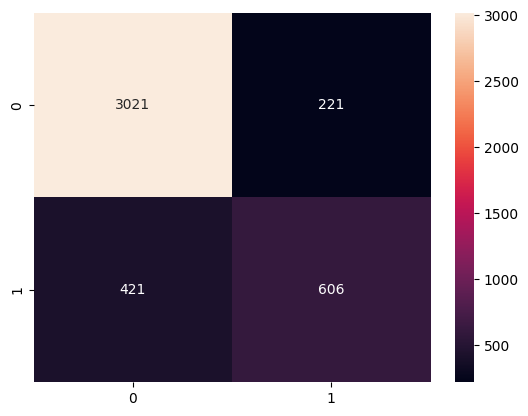

In [176]:
#Plotting Confusion Matrix
cm = confusion_matrix(y_test,supp.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# Random Forest

In [73]:
# calculating the accuracy of models with different values of max_depth
for i in range(2,20):
    #Train Model and Predict  
    rfc = RandomForestClassifier(n_estimators = 32, criterion="entropy", max_depth=i)

    rfc.fit(X_train, y_train)
# performing predictions on the test dataset
    rfcres = rfc.predict(X_test)
    print(i," " ,accuracy_score(y_test, rfcres))


2   0.7737174982431483
3   0.8046380885453268
4   0.8360271726399625
5   0.8416490981494495
6   0.8451628015928789
7   0.8460997891777934
8   0.8554696650269384
9   0.8524244553759662
10   0.855703911923167
11   0.8561724057156243
12   0.8559381588193956
13   0.857577887092996
14   0.855703911923167
15   0.8564066526118529
16   0.8524244553759662
17   0.8578121339892246
18   0.8573436401967673
19   0.8538299367533381


In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 32, criterion="entropy", max_depth=17)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rfc.fit(X_train, y_train)

# performing predictions on the test dataset
rfcres = rfc.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, rfcres))

ACCURACY OF THE MODEL:  0.8571093933005388


<AxesSubplot: >

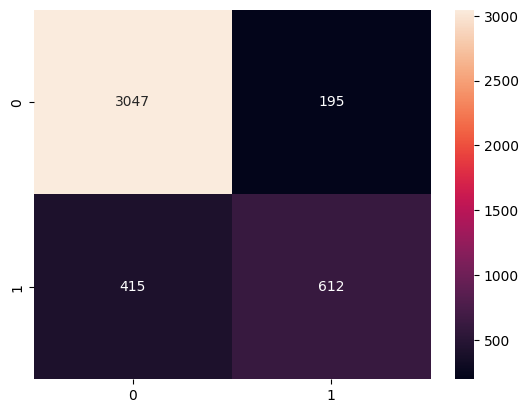

In [76]:
#Plotting Confusion Matrix
cm = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

## Gradient Boosting Classifier

In [78]:
for i in range(2,20):
    #Train Model and Predict  
    GBC = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=i)

    gbcres = GBC.fit(X_train, y_train).predict(X_test)
    
    print(i," " ,accuracy_score(y_test, gbcres))


2   0.8582806277816819
3   0.8587491215741392
4   0.859451862262825
5   0.8554696650269384
6   0.855703911923167
7   0.8524244553759662
8   0.8547669243382525
9   0.8533614429608808
10   0.8484422581400797
11   0.8493792457249941
12   0.8510189739985945
13   0.8456312953853361
14   0.8468025298664793
15   0.8430545795268213
16   0.8409463574607636
17   0.8451628015928789
18   0.8402436167720778
19   0.8393066291871633


In [82]:
GBC = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3)
gbcres = GBC.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, gbcres))


0.8587491215741392


<AxesSubplot: >

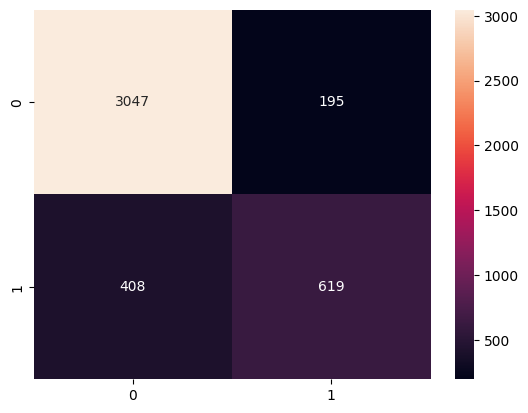

In [83]:
#Plotting Confusion Matrix
cm = confusion_matrix(y_test,GBC.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

## Ada Boost Classifier

In [90]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, y_train).predict(X_test)
score = accuracy_score(y_test, adaboost)
print(score)

0.8517217146872804


<AxesSubplot: >

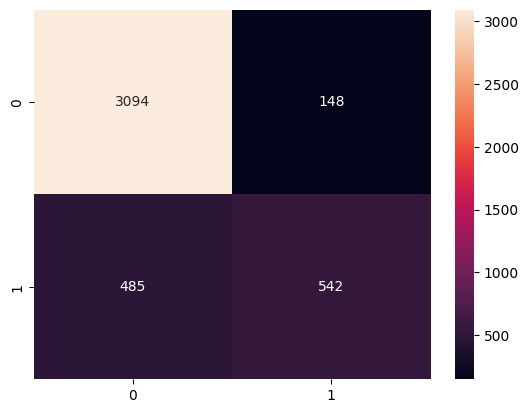

In [91]:
#Plotting Confusion Matrix
cm = confusion_matrix(y_test,adaboost)
sns.heatmap(cm,annot=True,fmt="d")

## Stacking Classifier

In [86]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors=38, weights="distance", metric="manhattan")))
level0.append(('dtc',DecisionTreeClassifier(random_state=42, max_depth =9, max_leaf_nodes=62)))
level0.append(('svm', SVC(kernel="linear", gamma=1)))
level0.append(("gbc", GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3)))
level0.append(("rfc", RandomForestClassifier(n_estimators = 32, criterion="entropy", max_depth=17)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example

yhat = model.predict(X_test)


In [87]:
print(yhat)

[0 1 0 ... 0 0 0]


In [88]:
print(accuracy_score(y_test, yhat))

0.8589833684703677


<AxesSubplot: >

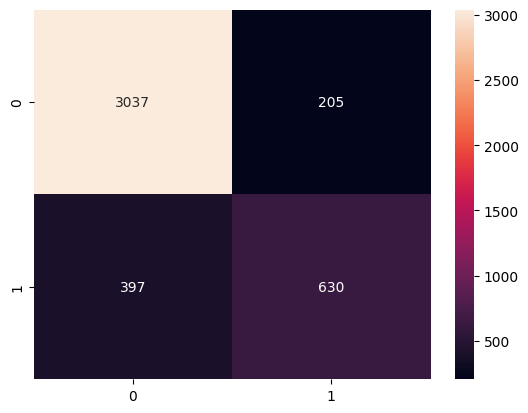

In [92]:
#Plotting Confusion Matrix
cm = confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True,fmt="d")